<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/Sesi%C3%B3n%203/3_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 4: Redes neuronales artificiales
## Tema: redes neuronales convolucionales

El objetivo de esta libreta es entrenar una red convolucional para clasificar imágenes del conjunto de datos [fashion_mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist)


Algunas notas del conjunto de fashion_mnist:

* Contiene 70,000 imágenes (igual que MNIST).
* Las imágenes son en blanco y negro.
* El tamaño de cada imagen es de 28x28.
* Es un conjunto de datos etiquetado

# Redes Neuronales Convolucionales


Recordemos:

* Las Redes Neuronales Convolucionales (**Convolutional Neural Networks** en inglés, abreviadas como CNN) son un tipo de red neuronal artificial especialmente diseñada para procesar datos que tienen una estructura de malla, como imágenes, vídeos o señales de audio.
* Las CNN utilizan una operación matemática llamada **convolución** para extraer características relevantes de los datos de entrada y aprender a reconocer patrones en ellos.
* Las capas convolucionales de una CNN están compuestas por un conjunto de **filtros o kernels** que se aplican de forma repetida a la imagen de entrada, cada uno generando un mapa de características.
* Las CNN son especialmente útiles en tareas de **visión por computadora**, como la clasificación de imágenes, la detección de objetos y la segmentación semántica.


Durante la convolución, estas redes aprenden patrones particulares en las imágenes. A diferencia de la práctica anterior, donde los valores de los filtros se colocaron manualmente, en la realidad, estos valores son aprendidos durante el entrenamiento.

<img src='https://ichi.pro/assets/images/max/724/1*QPRC1lcfYxcWWPAC2hrQgg.gif'>



In [ ]:
#Carga de bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


## Paso 1: Carga de datos

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255. #Rescalando datos
test_images = test_images/255. #Rescalando datos
train_images = tf.expand_dims(train_images, axis=-1)
test_images = tf.expand_dims(test_images, axis=-1)
print("Tamaño del conjunto de entrenamiento: ", train_images.shape)
print("Tamaño del conjunto de prueba: ", test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento:  (60000, 28, 28, 1)
Tamaño del conjunto de prueba:  (10000, 28, 28, 1)


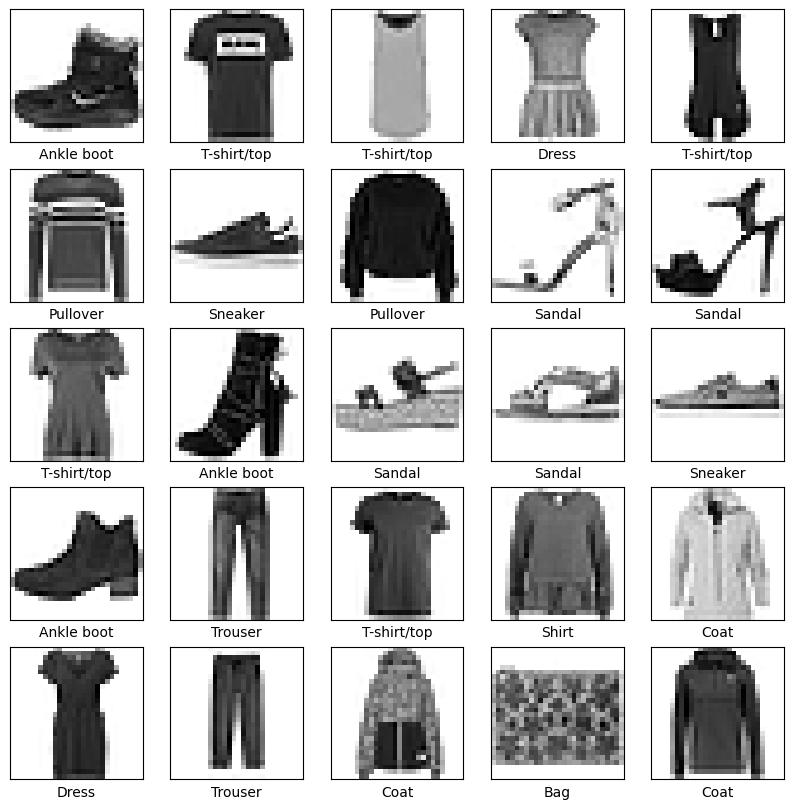

In [ ]:
#Visualizando algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, ..., 0], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

## Paso 2: Definición de la arquitectura

Parámetros a definir:

1.   Tamaño del filtro o kernel (recuerda la salida de una convolución es un mapa de características).
2.   Selección de la capa de agrupamiento (pooling): maxpooling o average pooling. Esta capa tiene como función:
* Reducir la dimensionalidad de las capas más profundas,
* Conservar información relevante de las capas anteriores.
3. Capa de activación (relu, tanh, .....)
4. Tamaño de la capa completamente conectada (esta última capa se utiliza para hacer clasificaciones o regresiones)



In [ ]:
modelo = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),# Aplanado
    keras.layers.Dense(10, activation='softmax') #Capa completamente conectada
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelo.build(input_shape=train_images.shape)
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (60000, 28, 28, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (60000, 28, 28, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (60000, 28, 28, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (60000, 28, 28, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (60000, 25088)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (60000, 10)            │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,994 (1.03 MB)

 Trainable params: 269,994 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Entrenamiento
modelo.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8224 - loss: 0.5002
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9081 - loss: 0.2549
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9310 - loss: 0.1887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9447 - loss: 0.1515
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9574 - loss: 0.1184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9662 - loss: 0.0938
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9734 - loss: 0.0735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9789 - loss: 0.0588
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0470
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0384


## Paso 3: evaluación del modelo

In [ ]:
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nPrecisión:', test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9069 - loss: 0.4373

Precisión: 0.9068999886512756


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clases[predicted_label],
                                100*np.max(predictions_array),
                                clases[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


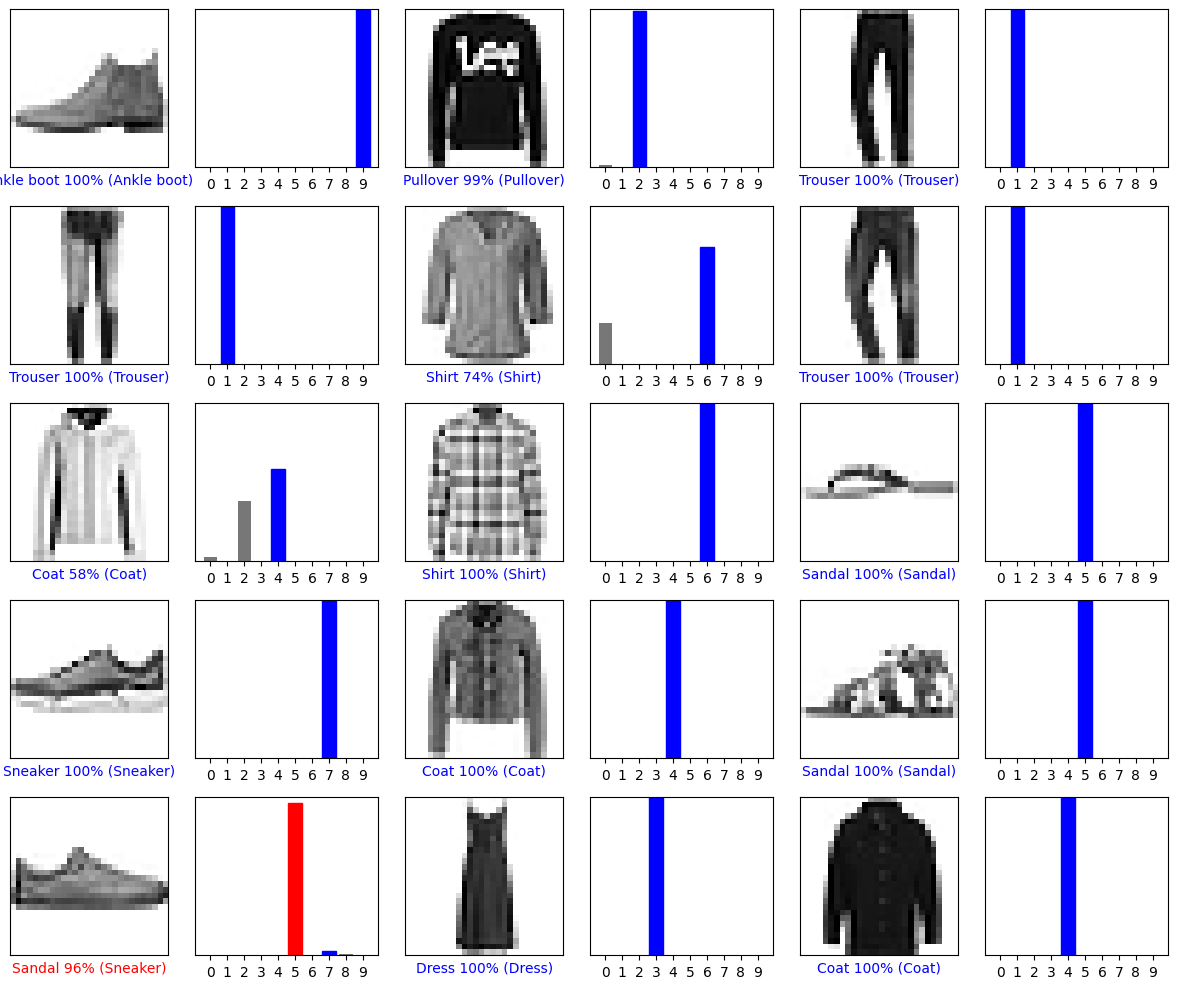

In [ ]:
predictions = modelo.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images[..., 0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()